In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import joblib
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [55]:
X_train_scaled = joblib.load("../data/processed/X_train_scaled.pkl")
X_test_scaled = joblib.load("../data/processed/X_test_scaled.pkl")
X_train = joblib.load("../data/processed/X_train.pkl")
y_train = joblib.load("../data/processed/y_train.pkl")
X_test = joblib.load("../data/processed/X_test.pkl")
y_test = joblib.load("../data/processed/y_test.pkl")

In [43]:
model = LinearRegression()

In [24]:
model.fit(X_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [25]:
coef_df = pd.DataFrame({
    "feature": X_train.columns,
    "coefficient": model.coef_
}).sort_values("coefficient", ascending=False)

coef_df

,feature,coefficient
2,sqft_living,0.155519
8,grade,0.115770
16,zipcode_98004,0.106653
55,zipcode_98103,0.092850
62,zipcode_98115,0.091248
...,...,...
15,zipcode_98003,-0.001186
14,zipcode_98002,-0.002096
77,zipcode_98168,-0.005021
33,zipcode_98032,-0.006584


In [26]:
y_pred = model.predict(X_test_scaled)

In [ ]:
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

R2: 0.8742700955616357


In [28]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 0.13754316787260246


In [29]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 0.18930634757940065


In [30]:
print("Train R2:", model.score(X_train_scaled, y_train))
print("Test R2:", model.score(X_test_scaled, y_test))

Train R2: 0.8757381763959102
Test R2: 0.8742700955616357


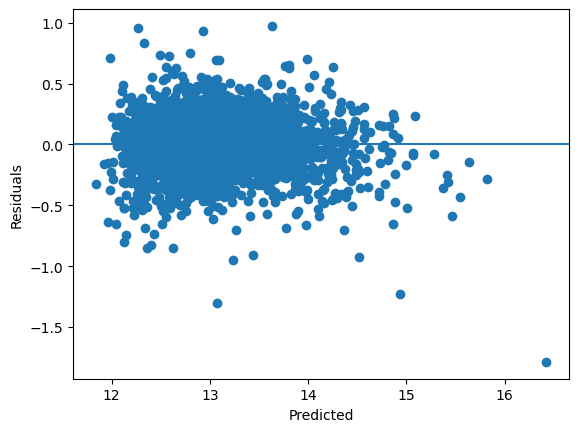

In [31]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [33]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [34]:
y_pred_ridge = ridge.predict(X_test_scaled)

In [45]:
print("R2:", r2_score(y_test, y_pred_ridge))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("Train R2:", ridge.score(X_train_scaled, y_train))
print("Test R2:", ridge.score(X_test_scaled, y_test))

R2: 0.8742678085451737
MAE: 0.13754659571965647
RMSE: 0.18930806930489788
Train R2: 0.8757378397353125
Test R2: 0.8742678085451737


In [ ]:
ridge_Pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5))
])

ridge_Pipeline.fit(X_train, y_train)
y_predict = ridge_Pipeline.predict(X_test)

R2 0.8742686649875573
Best alpha: 0.655128556859551
Train R2: 0.8757380297806576
Test R2: 0.8742686649875573


In [58]:
print("R2", r2_score(y_test, y_predict))
print("Best alpha:", ridge_Pipeline.named_steps["ridge"].alpha_)
print("Train R2:", ridge_Pipeline.score(X_train, y_train))
print("Test R2:", ridge_Pipeline.score(X_test, y_test))

R2 0.8742686649875573
Best alpha: 0.655128556859551
Train R2: 0.8757380297806576
Test R2: 0.8742686649875573


In [36]:
alphas = np.logspace(-3, 3, 50)
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

print("Best alpha", ridge_cv.alpha_)

Best alpha 0.655128556859551


In [37]:
y_pred_ridge_cv = ridge_cv.predict(X_test_scaled)

print("R2:", r2_score(y_test, y_pred_ridge_cv))
print("Train R2:", ridge_cv.score(X_train_scaled, y_train))
print("Test R2:", ridge_cv.score(X_test_scaled, y_test))

R2: 0.8742686649875573
Train R2: 0.8757380297806576
Test R2: 0.8742686649875573


In [38]:
y_train.describe()

count    17290.000000
mean        13.045168
std          0.524834
min         11.225257
25%         12.676548
50%         13.017005
75%         13.369225
max         15.856731
Name: price, dtype: float64